In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [29]:
pip install torch

In [30]:
import torch
import torch.nn as nn

In [31]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [32]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
file_path = '/content/drive/My Drive/AAPL_1min.txt'

# Load the text file into a DataFrame
df = pd.read_csv(file_path)
df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
df

,timestamp,open,high,low,close,volume
0,2005-01-03 08:02:00,0.9863,0.9863,0.9863,0.9863,304360
1,2005-01-03 08:03:00,0.9955,0.9956,0.9955,0.9956,16800
2,2005-01-03 08:04:00,0.9962,0.9985,0.9962,0.9985,161504
3,2005-01-03 08:07:00,0.9971,0.9971,0.9970,0.9970,50400
4,2005-01-03 08:08:00,0.9962,0.9970,0.9962,0.9970,16800
...,...,...,...,...,...,...
2743497,2022-02-25 19:54:00,164.3100,164.3100,164.3100,164.3100,350
2743498,2022-02-25 19:55:00,164.3200,164.3200,164.3200,164.3200,100
2743499,2022-02-25 19:57:00,164.3800,164.3800,164.3800,164.3800,422
2743500,2022-02-25 19:58:00,164.3400,164.3400,164.3300,164.3300,557


In [34]:
# # Calculate the number of rows to keep (last 20%)
# trim_df_rows = int(0.5 * len(df))

# # Select the last 20% of the data
# df = df.iloc[-trim_df_rows:]

# # Reset the index if needed
# df.reset_index(drop=True, inplace=True)

# # Now, df contains only the last 20% of your data
# df

In [35]:
df = df[['timestamp', 'close']]
df

,timestamp,close
0,2005-01-03 08:02:00,0.9863
1,2005-01-03 08:03:00,0.9956
2,2005-01-03 08:04:00,0.9985
3,2005-01-03 08:07:00,0.9970
4,2005-01-03 08:08:00,0.9970
...,...,...
2743497,2022-02-25 19:54:00,164.3100
2743498,2022-02-25 19:55:00,164.3200
2743499,2022-02-25 19:57:00,164.3800
2743500,2022-02-25 19:58:00,164.3300


<ipython-input-36-ffbfa912c899>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


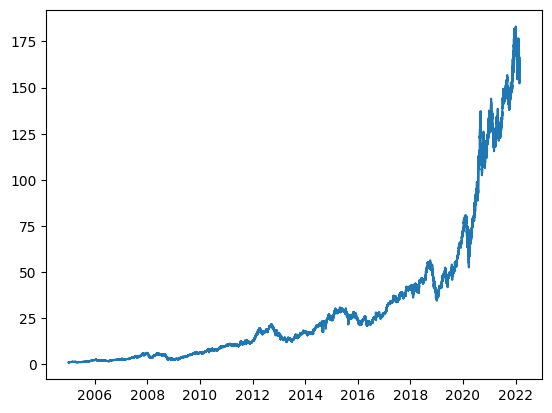

In [36]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.plot(df['timestamp'], df['close'])

In [37]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('timestamp', inplace=True)

    for i in range(1, n_steps+1):
        df[f'close(t-{i})'] = df['close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 15
shifted_df = prepare_dataframe_for_lstm(df, lookback)
shifted_df

,close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7),close(t-8),close(t-9),close(t-10),close(t-11),close(t-12),close(t-13),close(t-14),close(t-15)
timestamp,,,,,,,,,,,,,,,,
2005-01-03 08:25:00,0.9970,0.9968,0.9955,0.9958,0.9955,0.9955,0.9955,0.9955,0.9955,0.9962,0.9970,0.9970,0.9970,0.9985,0.9956,0.9863
2005-01-03 08:27:00,0.9955,0.9970,0.9968,0.9955,0.9958,0.9955,0.9955,0.9955,0.9955,0.9955,0.9962,0.9970,0.9970,0.9970,0.9985,0.9956
2005-01-03 08:28:00,0.9955,0.9955,0.9970,0.9968,0.9955,0.9958,0.9955,0.9955,0.9955,0.9955,0.9955,0.9962,0.9970,0.9970,0.9970,0.9985
2005-01-03 08:30:00,0.9955,0.9955,0.9955,0.9970,0.9968,0.9955,0.9958,0.9955,0.9955,0.9955,0.9955,0.9955,0.9962,0.9970,0.9970,0.9970
2005-01-03 08:31:00,0.9955,0.9955,0.9955,0.9955,0.9970,0.9968,0.9955,0.9958,0.9955,0.9955,0.9955,0.9955,0.9955,0.9962,0.9970,0.9970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-25 19:54:00,164.3100,164.2900,164.2600,164.2800,164.3000,164.4100,164.2800,164.2400,164.2200,164.2700,164.2400,164.2100,164.2100,164.1700,164.1600,164.2000
2022-02-25 19:55:00,164.3200,164.3100,164.2900,164.2600,164.2800,164.3000,164.4100,164.2800,164.2400,164.2200,164.2700,164.2400,164.2100,164.2100,164.1700,164.1600
2022-02-25 19:57:00,164.3800,164.3200,164.3100,164.2900,164.2600,164.2800,164.3000,164.4100,164.2800,164.2400,164.2200,164.2700,164.2400,164.2100,164.2100,164.1700


In [38]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[  0.997 ,   0.9968,   0.9955, ...,   0.9985,   0.9956,   0.9863],
       [  0.9955,   0.997 ,   0.9968, ...,   0.997 ,   0.9985,   0.9956],
       [  0.9955,   0.9955,   0.997 , ...,   0.997 ,   0.997 ,   0.9985],
       ...,
       [164.38  , 164.32  , 164.31  , ..., 164.21  , 164.21  , 164.17  ],
       [164.33  , 164.38  , 164.32  , ..., 164.24  , 164.21  , 164.21  ],
       [164.34  , 164.33  , 164.38  , ..., 164.27  , 164.24  , 164.21  ]])

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99956853, -0.99957073, -0.999585  , ..., -0.99955206,
        -0.9995839 , -0.99968601],
       [-0.999585  , -0.99956853, -0.99957073, ..., -0.99956853,
        -0.99955206, -0.9995839 ],
       [-0.999585  , -0.999585  , -0.99956853, ..., -0.99956853,
        -0.99956853, -0.99955206],
       ...,
       [ 0.79418342,  0.79352469,  0.79341491, ...,  0.79231702,
         0.79231702,  0.79187787],
       [ 0.79363448,  0.79418342,  0.79352469, ...,  0.79264639,
         0.79231702,  0.79231702],
       [ 0.79374427,  0.79363448,  0.79418342, ...,  0.79297575,
         0.79264639,  0.79231702]])

In [40]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((2743487, 15), (2743487,))

In [41]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99968601, -0.9995839 , -0.99955206, ..., -0.99958171,
        -0.999585  , -0.99957073],
       [-0.9995839 , -0.99955206, -0.99956853, ..., -0.999585  ,
        -0.99957073, -0.99956853],
       [-0.99955206, -0.99956853, -0.99956853, ..., -0.99957073,
        -0.99956853, -0.999585  ],
       ...,
       [ 0.79187787,  0.79231702,  0.79231702, ...,  0.79319533,
         0.79341491,  0.79352469],
       [ 0.79231702,  0.79231702,  0.79264639, ...,  0.79341491,
         0.79352469,  0.79418342],
       [ 0.79231702,  0.79264639,  0.79297575, ...,  0.79352469,
         0.79418342,  0.79363448]])

In [42]:
split_index = int(len(X) * 0.65)

split_index

1783266

In [43]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1783266, 15), (960221, 15), (1783266,), (960221,))

In [44]:
lookback

15

In [45]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1783266, 15, 1), (960221, 15, 1), (1783266, 1), (960221, 1))

In [46]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1783266, 15, 1]),
 torch.Size([960221, 15, 1]),
 torch.Size([1783266, 1]),
 torch.Size([960221, 1]))

In [47]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [48]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [49]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 15, 1]) torch.Size([16, 1])


In [50]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [51]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [52]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [53]:
learning_rate = 0.01
num_epochs = 3
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.168
Batch 200, Loss: 0.009
Batch 300, Loss: 0.008
Batch 400, Loss: 0.008
Batch 500, Loss: 0.007
Batch 600, Loss: 0.001
Batch 700, Loss: 0.000
Batch 800, Loss: 0.000
Batch 900, Loss: 0.000
Batch 1000, Loss: 0.000
Batch 1100, Loss: 0.000
Batch 1200, Loss: 0.000
Batch 1300, Loss: 0.000
Batch 1400, Loss: 0.000
Batch 1500, Loss: 0.000
Batch 1600, Loss: 0.000
Batch 1700, Loss: 0.000
Batch 1800, Loss: 0.000
Batch 1900, Loss: 0.000
Batch 2000, Loss: 0.000
Batch 2100, Loss: 0.000
Batch 2200, Loss: 0.000
Batch 2300, Loss: 0.000
Batch 2400, Loss: 0.000
Batch 2500, Loss: 0.000
Batch 2600, Loss: 0.000
Batch 2700, Loss: 0.000
Batch 2800, Loss: 0.000
Batch 2900, Loss: 0.000
Batch 3000, Loss: 0.000
Batch 3100, Loss: 0.000
Batch 3200, Loss: 0.000
Batch 3300, Loss: 0.000
Batch 3400, Loss: 0.000
Batch 3500, Loss: 0.000
Batch 3600, Loss: 0.000
Batch 3700, Loss: 0.000
Batch 3800, Loss: 0.000
Batch 3900, Loss: 0.000
Batch 4000, Loss: 0.000
Batch 4100, Loss: 0.000
Batch 4200, Loss

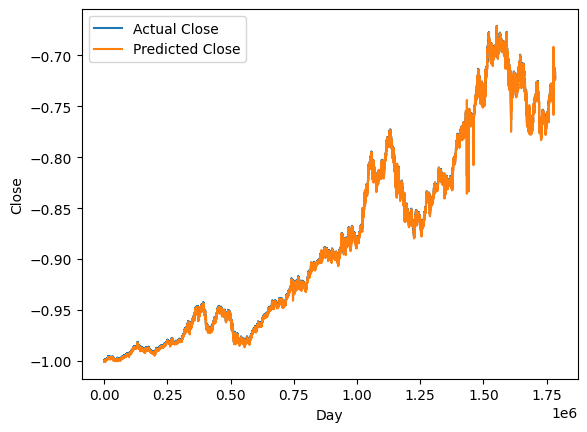

In [54]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [55]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([ 0.9199789 ,  0.91975088,  0.91797014, ..., 26.32562005,
       26.30696581, 26.34783576])

In [56]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 0.99700096,  0.99550254,  0.99550254, ..., 26.37100156,
       26.40039992, 26.4190976 ])

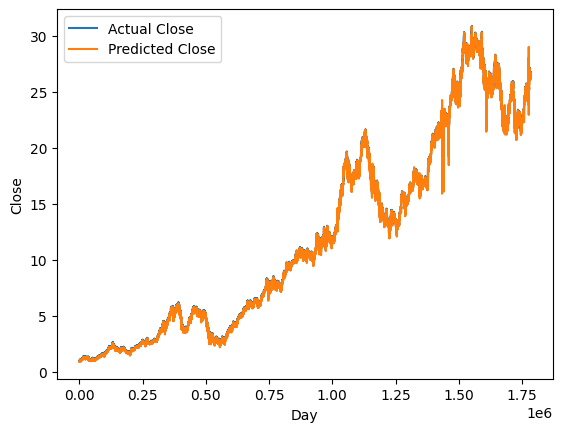

In [57]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [58]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([ 26.36388406,  26.34281931,  26.37969348, ..., 112.91280137,
       112.93158048, 112.90996197])

In [59]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([ 26.40750113,  26.43320229,  26.44719841, ..., 164.38000091,
       164.32999927, 164.3399996 ])

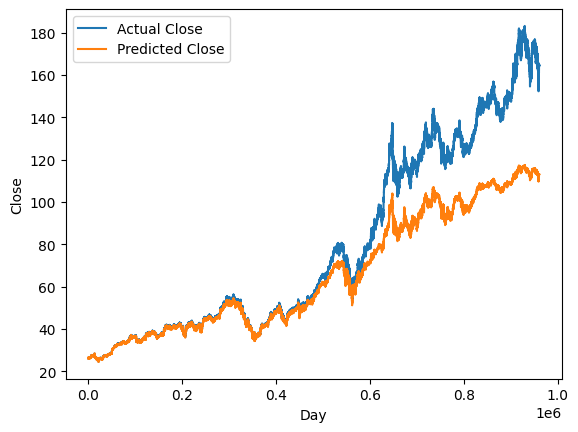

In [60]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()